In [1]:
import eland as ed
import matplotlib.pyplot as plt
import os

from elasticsearch import Elasticsearch
from dotenv import load_dotenv
from app.utils.backtesting_utils import get_bbands

os.chdir("..")
load_dotenv()

True

In [2]:
es_url = os.environ.get('ELASTICSEARCH_URL')
es_api_key = os.environ.get('ELASTICSEARCH_API_KEY')
es = Elasticsearch(hosts=[f"{es_url}"], api_key=es_api_key)

In [3]:
%%capture
ticker="META"
df_eod = ed.DataFrame(es, es_index_pattern="quant-agents_stocks-eod_*")
df_eod = df_eod[(df_eod.key_ticker == ticker)]
df_bbands = ed.eland_to_pandas(df_eod).sort_values(by='date_reference', ascending=True).tail(100).set_index('date_reference')

period = 20
std_dev = 2
df_bbands = get_bbands(df_bbands, period=period, std_dev=std_dev)

In [4]:
df_bbands.tail()

,key_ticker,val_close,val_high,val_low,val_open,val_volume,tp,middle_band,sd,upper_band,lower_band,band_width,prev_close,prev_middle,position
date_reference,,,,,,,,,,,,,,,
2025-10-17,META,716.915,718.54,706.12,707.075,12232441,713.858333,728.200988,19.493139,767.187266,689.214711,10.707560,712.070,731.480907,0
2025-10-20,META,732.170,733.77,720.18,721.190,8900204,728.706667,726.046988,16.586959,759.220906,692.873071,9.138229,716.915,728.200988,0
2025-10-21,META,733.270,738.50,728.75,736.015,7647269,733.506667,724.771155,14.802328,754.375811,695.166499,8.169380,732.170,726.046988,0
2025-10-22,META,733.410,740.60,724.03,733.830,8734491,732.680000,723.500237,12.737453,748.975143,698.025331,7.042128,733.270,724.771155,0
2025-10-23,META,734.000,742.41,733.10,734.700,9855974,736.503333,722.821653,11.553683,745.929020,699.714287,6.393657,733.410,723.500237,0


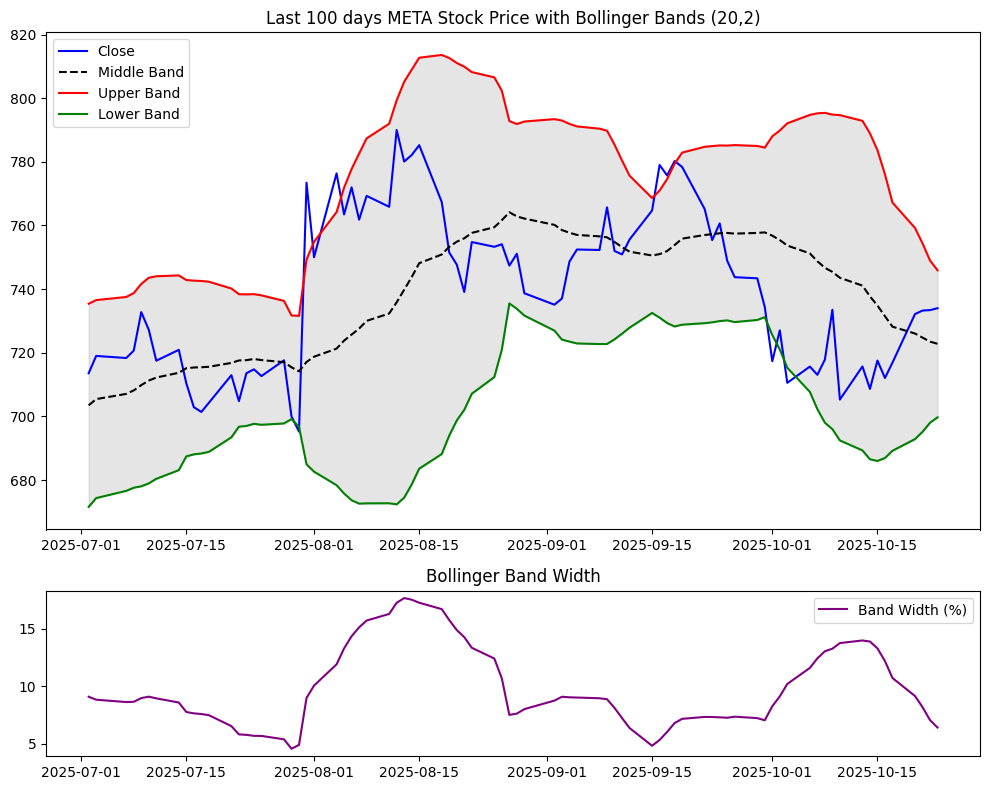

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top: Price with BBANDS
axs[0].plot(df_bbands.index, df_bbands['val_close'], label='Close', color='blue')
axs[0].plot(df_bbands.index, df_bbands['middle_band'], label='Middle Band', color='black', linestyle='--')
axs[0].plot(df_bbands.index, df_bbands['upper_band'], label='Upper Band', color='red')
axs[0].plot(df_bbands.index, df_bbands['lower_band'], label='Lower Band', color='green')
axs[0].fill_between(df_bbands.index, df_bbands['upper_band'], df_bbands['lower_band'], color='gray', alpha=0.2)
axs[0].set_title(f"Last 100 days {ticker} Stock Price with Bollinger Bands ({period},{std_dev})")
axs[0].legend()

# Bottom: Band Width
axs[1].plot(df_bbands.index, df_bbands['band_width'], label='Band Width (%)', color='purple')
axs[1].set_title('Bollinger Band Width')
axs[1].legend()

plt.tight_layout()
plt.show()

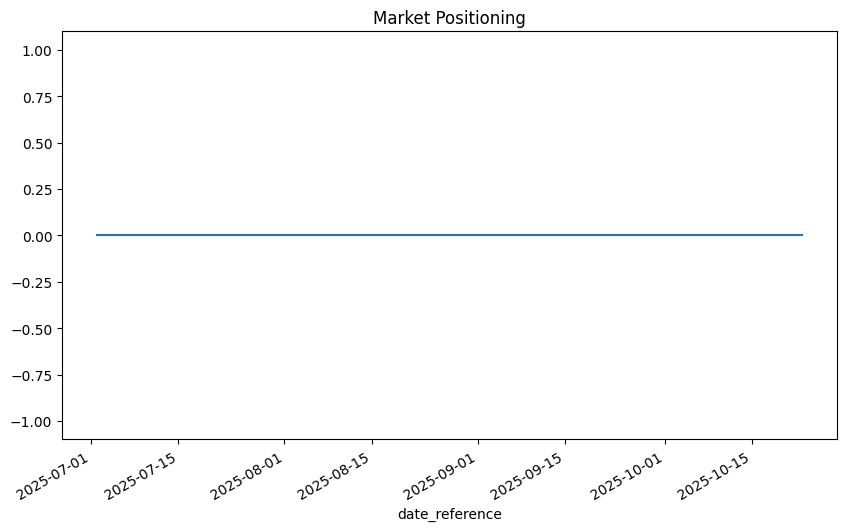

In [6]:
# Generate positions for the strategy (1 for bullish bounce/cross, -1 for bearish, 0 neutral)
df_bbands['position'].plot(
    ylim=[-1.1, 1.1],
    title='Market Positioning',
    figsize=(10, 6)
);